In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Abraar/OneDrive/Documents/Fertilizers.csv")

In [3]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [5]:
df1 = df.drop(columns=['Crop Type','Soil Type','Fertilizer Name'])

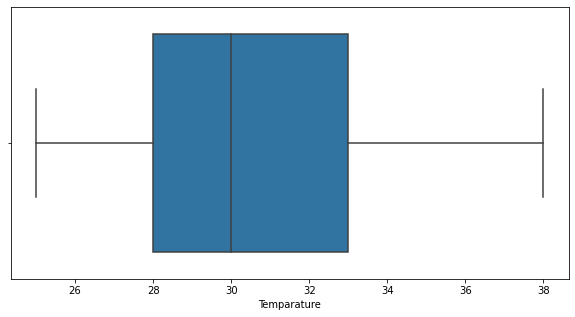

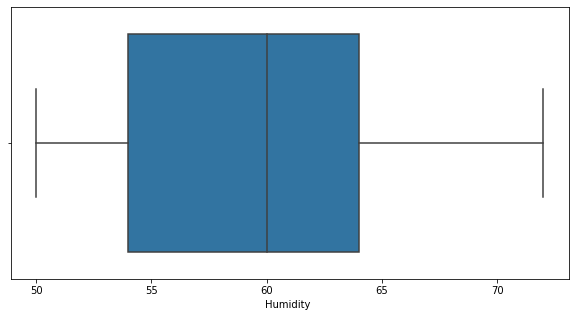

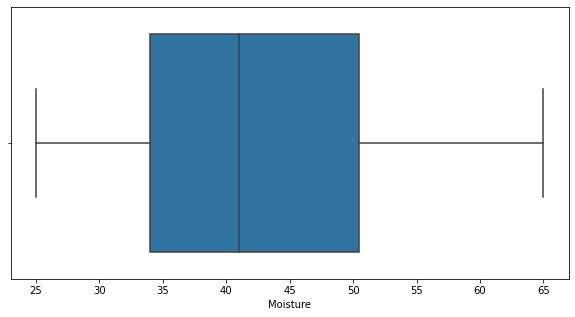

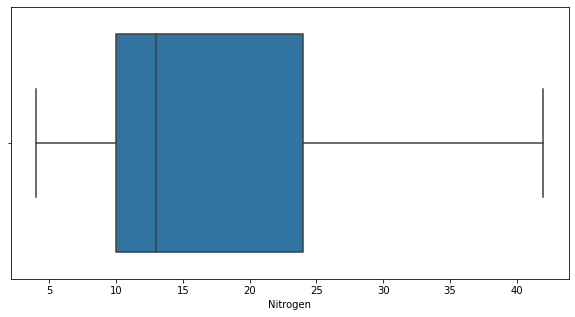

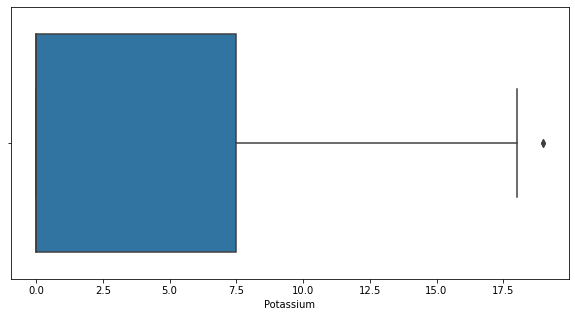

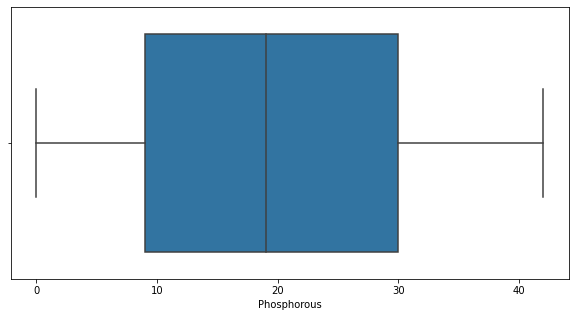

In [6]:
for column in df1.columns[:]:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=(column),data=df1)

In [7]:
q1=df['Potassium'].quantile(0.25)
q2=df['Potassium'].quantile(0.75)
IQR=q2-q1
lower_limit=q1-(1.5*IQR)
upper_limit=q2+(1.5*IQR)
df['Potassium']=np.where(df['Potassium']<=lower_limit,lower_limit,df['Potassium'])
df['Potassium']=np.where(df['Potassium']>=upper_limit,upper_limit,df['Potassium'])

<AxesSubplot:xlabel='Potassium'>

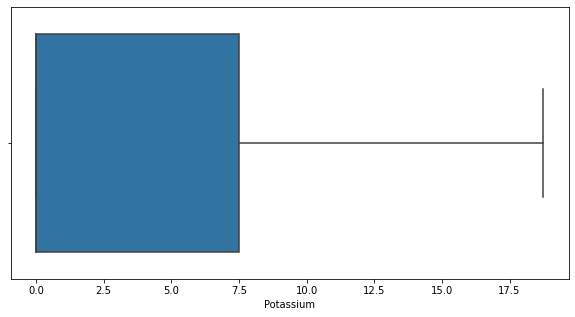

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Potassium',data=df)

In [9]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.378788,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.801056,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,18.750000,42.000000


In [10]:
df.corr()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
Temparature,1.000000,0.973164,0.091222,-0.033771,-0.023282,0.207545
Humidity,0.973164,1.000000,0.091342,-0.060646,-0.003594,0.204044
Moisture,0.091222,0.091342,1.000000,-0.095945,0.027845,0.009276
Nitrogen,-0.033771,-0.060646,-0.095945,1.000000,-0.500282,-0.686971
Potassium,-0.023282,-0.003594,0.027845,-0.500282,1.000000,0.089409
Phosphorous,0.207545,0.204044,0.009276,-0.686971,0.089409,1.000000


In [11]:
df.drop(columns=['Temparature','Humidity ','Moisture'],inplace=True)

In [12]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder


In [13]:
#encoding Soil Type variable
encode_soil = LabelEncoder()
df['Soil Type'] = encode_soil.fit_transform(df['Soil Type'])

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [14]:
encode_crop =  LabelEncoder()
df['Crop Type'] = encode_crop.fit_transform(df['Crop Type'])

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [15]:
encode_ferti = LabelEncoder()
df['Fertilizer Name'] = encode_ferti.fit_transform(df['Fertilizer Name'])

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Fertilizer Name',axis=1),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 5), y_train = (79,), x_test = (20, 5), y_test = (20,)


In [17]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 2 to 37
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Soil Type    79 non-null     int32  
 1   Crop Type    79 non-null     int32  
 2   Nitrogen     79 non-null     int64  
 3   Potassium    79 non-null     float64
 4   Phosphorous  79 non-null     int64  
dtypes: float64(1), int32(2), int64(2)
memory usage: 3.1 KB


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [19]:
x_train[['Nitrogen','Potassium','Phosphorous']] = sc.fit_transform(x_train[['Nitrogen','Potassium','Phosphorous']])
x_test[['Nitrogen','Potassium','Phosphorous']] = sc.transform(x_test[['Nitrogen','Potassium','Phosphorous']])

In [20]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [21]:
pred_rand = rand.predict(x_test)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Best score :  1.0
Best params :  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300}


In [23]:
y_train[2]

1

In [24]:
import pickle
pickle_out = open('newclassifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [25]:
df.head()

,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,4,3,37,0.0,0,6
1,2,8,12,0.0,36,5
2,0,1,7,9.0,30,1
3,3,9,22,0.0,20,4
4,1,6,35,0.0,0,6


In [26]:
model = pickle.load(open('newclassifier.pkl','rb'))
Soil = {'Black':0, 'Clayey':1, 'Loamy':2, 'Red':3, 'Sandy':4}
Crop = {'Barley':0, 'Cotton':1, 'Ground Nuts':2, 'Maize':3, 'Millets':4, 'Oil seeds':5,
       'Paddy':6, 'Pulses':7, 'Sugarcane':8, 'Tobacco':9, 'Wheat':10}
ans = model.predict([[Soil['Black'],Crop['Cotton'],7,10,18]])
if ans[0] == 0:
    print("10-26-26")
elif ans[0] ==1:
    print("14-35-14")
elif ans[0] == 2:
    print("17-17-17")
elif ans[0] == 3:
    print("20-20")
elif ans[0] == 4:
    print("28-28")
elif ans[0] == 5:
    print("DAP")
else:
    print("Urea")

Urea


C:\Users\Abraar\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
